In [1]:
#import necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\nerdy\Documents\Data Analysis\movies.csv')

In [2]:
#check first 5 rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check for null values
for col in df.columns:
    pct_null = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_null*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Since we found nulls, let's remove those rows
df = df.dropna()

In [5]:
# Check to see if nulls were deleted
for col in df.columns:
    pct_null = np.mean(df[col].isnull())
    print(col + ' - ' + str(round(pct_null*100))+ '%')

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:
#check column data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#check if the year column matches the year in release column
rows = df.iterrows()
no_of_mistakes = 0
for i, row in rows:
    start = row['released'].find('(') - 5
    year = int(row['released'][start:start+4])
    if row['year'] != year:
        no_of_mistakes +=1
print('No of rows to fix: ' + str(no_of_mistakes))

No of rows to fix: 708


In [8]:
# Create a new and correct 'year' column to properly match the year in 'release' column date
df = df.assign(new=None)
rows = df.iterrows()
for i, row in rows:
    start = row['released'].find('(') - 5
    year = int(row['released'][start:start+4])
    df.loc[i, 'new'] = year
    
    


In [9]:
# Check again for any errors
rows = df.iterrows()
no_of_mistakes = 0
for i, row in rows:
    start = row['released'].find('(') - 5
    year = int(row['released'][start:start+4])
    if year != row['new']:
        no_of_mistakes +=1
        print(row['name'], row['year'], row['released'], row['new'])
print('No of rows to fix: ' + str(no_of_mistakes))

No of rows to fix: 0


In [10]:
#drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


In [11]:
#change votes column to int to get rid of useless .0
df = df.astype({'votes': int})

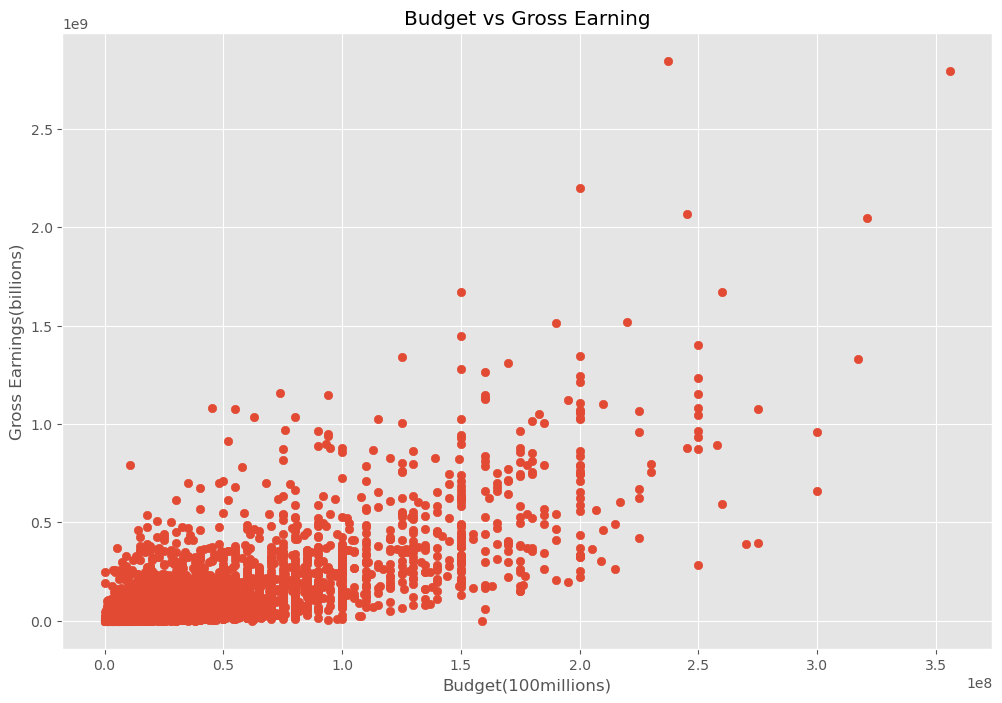

In [12]:
#check correlation between budget and gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget(100millions)')
plt.ylabel('Gross Earnings(billions)')
plt.show()

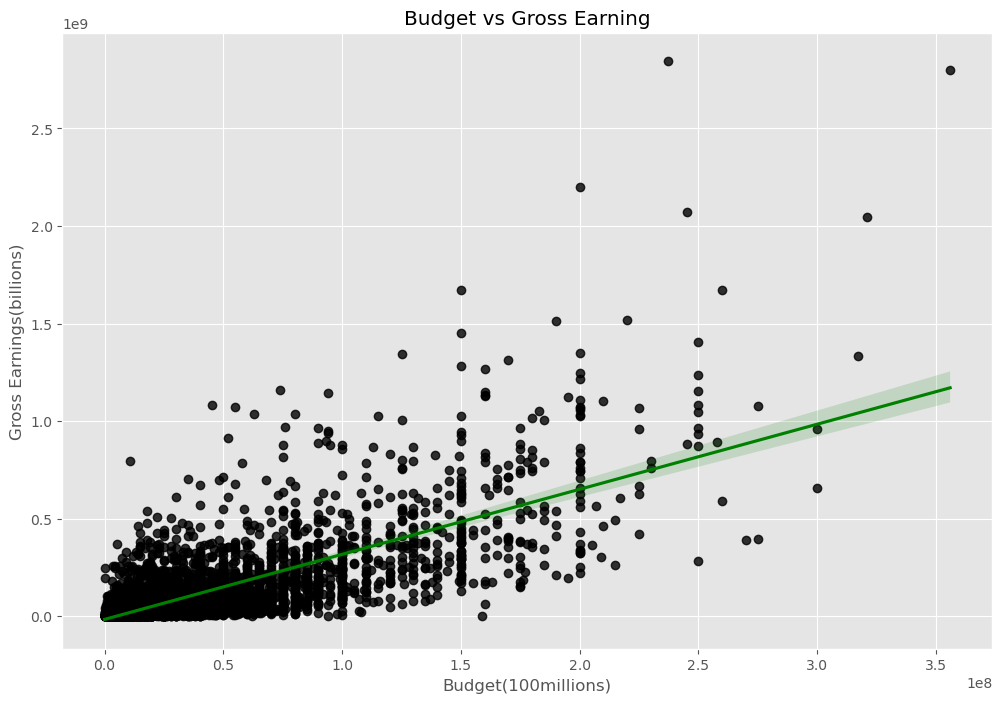

In [13]:
#check correlation between budget and gross using seaborn
ax = sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color': 'black'},line_kws={'color':'green'})
ax.set_title('Budget vs Gross Earning')
ax.set_xlabel('Budget(100millions)')
ax.set_ylabel('Gross Earnings(billions)')
plt.show()

In [14]:
#view correlation table of numeric fields
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


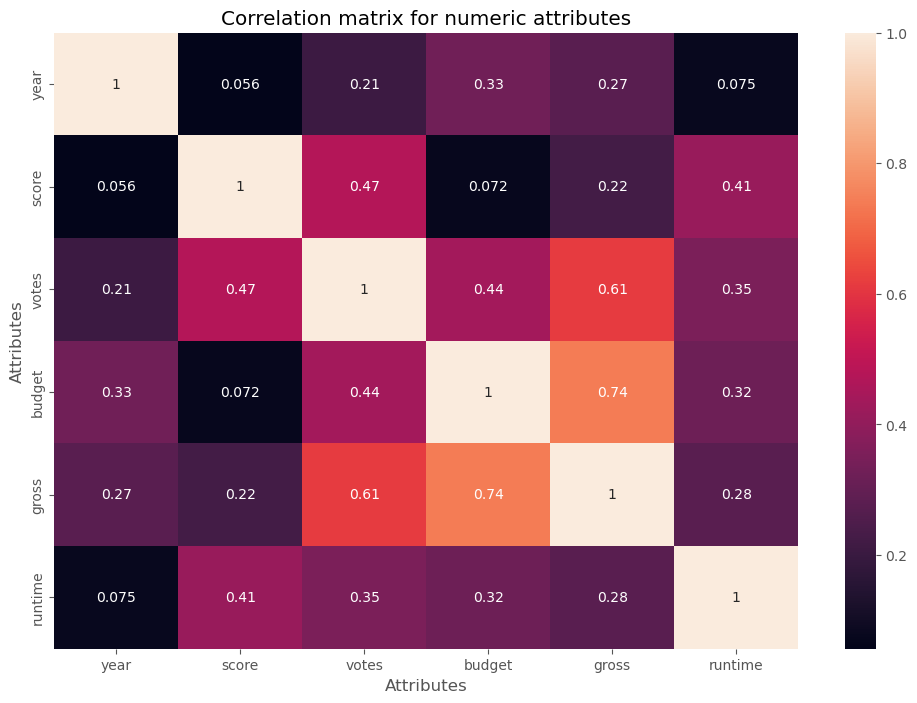

In [15]:
#view correlation matrix of numeric fields
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric attributes')
plt.xlabel('Attributes')
plt.ylabel('Attributes')

plt.show()

In [16]:
#give object rows a numeric value so we can test the correlation like above
df_numeric = df

for col in df_numeric.columns:
    if(df_numeric[col].dtype =='object'):
        df_numeric[col] = df_numeric[col].astype('category')
        df_numeric[col] = df_numeric[col].cat.codes

#compare to df.head() to ensure it converted correctly
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000.0,58853106.0,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000.0,538375067.0,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000.0,39846344.0,1083,98.0,0


In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000.0,58853106.0,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000.0,538375067.0,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000.0,39846344.0,1083,98.0,0


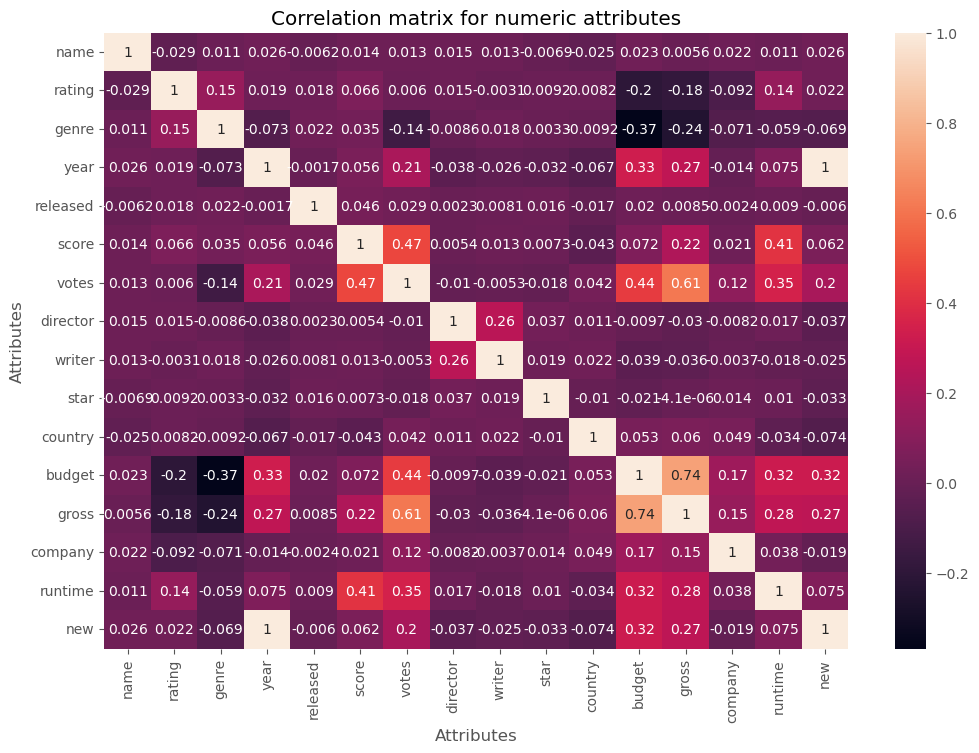

In [18]:
#view correlation matrix of all fields just for an example
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for all attributes')
plt.xlabel('Attributes')
plt.ylabel('Attributes')

plt.show()

In [19]:
#check for correlations greater than .5 but < 1 to avoid useless results
correlation_matrix = df_numeric.corr()
corr_unstack = correlation_matrix.unstack()
high_corr = corr_unstack[corr_unstack > .5][corr_unstack < 1]
high_corr

year    new       0.998726
votes   gross     0.614751
budget  gross     0.740247
gross   votes     0.614751
        budget    0.740247
new     year      0.998726
dtype: float64

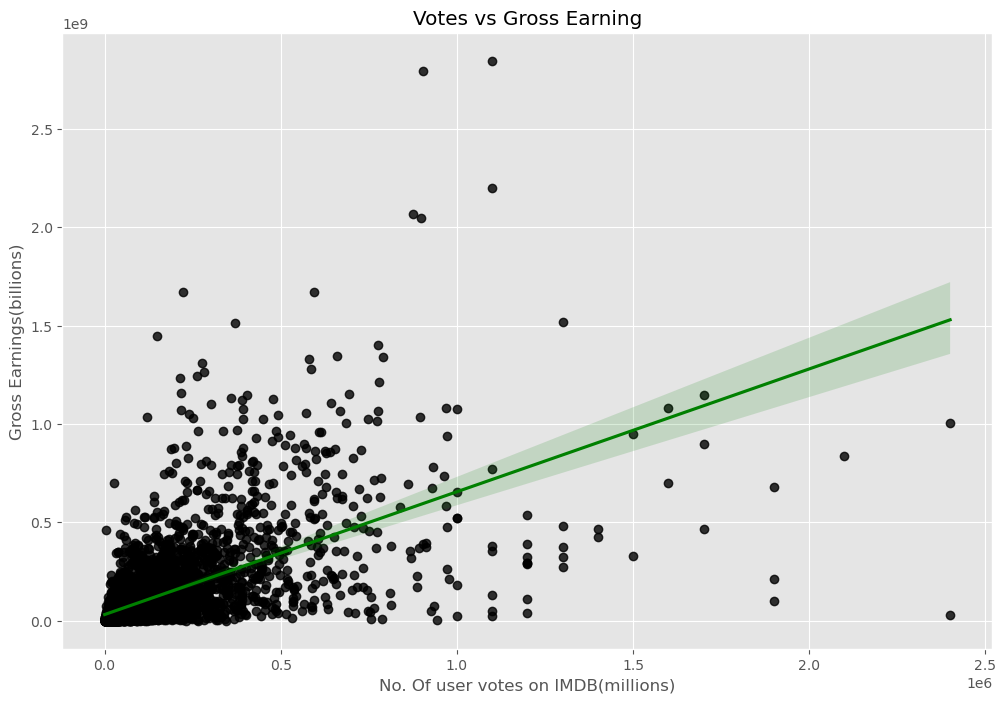

In [20]:
#visualize correletion between no. of user votes on IMDB and gross earnings
ax = sns.regplot(x='votes',y='gross',data=df, scatter_kws={'color': 'black'},line_kws={'color':'green'})
ax.set_title('Votes vs Gross Earning')
ax.set_xlabel('No. Of user votes on IMDB(millions)')
ax.set_ylabel('Gross Earnings(billions)')
plt.show()

In [21]:
#Budget and Votes have the highest correlation to gross earnings